# Введение в численные методы и градиенты спуск
Создано с использованием идей и материалов Александра Катруцы и Нейчева Радослава Георгиева 

автор Д.В.Яценко


## А зачем?


* Раздел вышмата - численные методы 
* Задачи нахождения минимакса
* Многие алгоритмы ML - регрессия, линейные модели, как эдемент более сложных моделей. 
* j4f



## Аналитический подход
$$
f(x,y)= x^2 + y^2  + 4x + 4y
$$

$$\frac{df(x)}{dx} = 2x+4$$

$$\frac{df(y)}{dy} = 2y+4$$

$$
f_x'=0, f_y'=0  
$$

\begin{equation*}
 \begin{cases}
   2x+4=0 
   \\
   2y+4=0
\end{cases}
\end{equation*}

$$
M_0 (-2,-2)
$$

$$
A=f_{xx}''=2,B=f_{xy}''=0,C=f_{yy}''=2; \\ AB-C^2=4 \Rightarrow min
$$




In [2]:
# Import libraries
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import derivative

np.random.seed=42

In [3]:
def func(x,y):
  return x**2 +y**2  + 4*x + 4*y

In [4]:
def plot_func(func,from_val,to_val,step): 
  # Creating dataset
  x = np.outer(np.linspace(from_val, to_val, step), np.ones(step))
  y = x.copy().T # transpose
  z = func(x,y)
  
  # Creating figure
  fig = plt.figure(figsize =(14, 9))
  ax = plt.axes(projection ='3d')
  
  # Creating plot
  ax.plot_surface(x, y, z)
  
  # show plot
  plt.show()

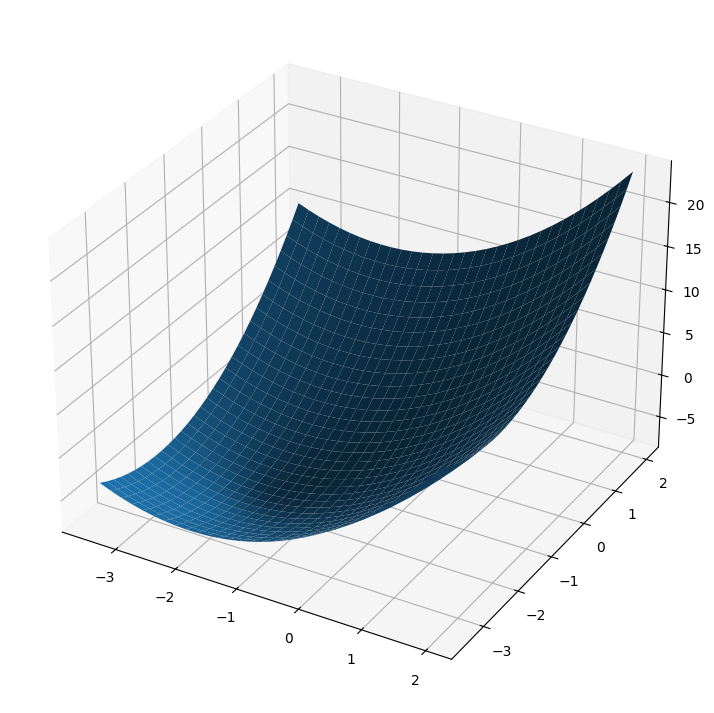

In [5]:
plot_func(func,-3.5,2,32)

## Решение методом градиентного спуска
$$
f(x) = 3x^4-2x^2+
0.1x
$$

In [6]:
def func(x):
  return 3*x**4-2*x**2+0.1*x

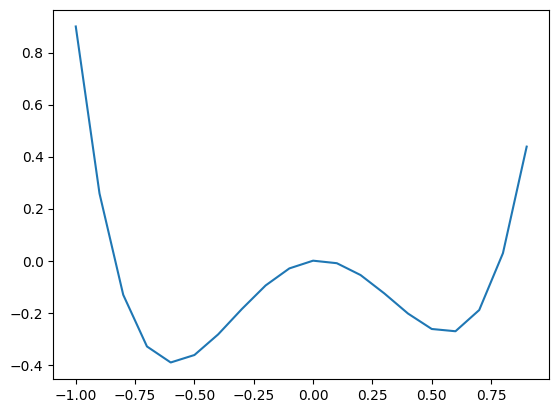

In [7]:
x = np.arange(-1,1,0.1)
plt.plot(x,func(x))
plt.show()

$$
f'(x)=12x^3-4*x
$$
$$
x^{k+1} = x^{k} - α ∇f(x^k) \ ,\ где\ в\ нашем\ случае \\
∇f ≡ f'
$$

In [8]:
lr=0.1 #0.51 # 0.3 0.2 0.1
x = np.arange(-1,1,0.1)
y = func(x)
x_gd=np.array([np.random.random()*2-1])
y_gd=func(x_gd)

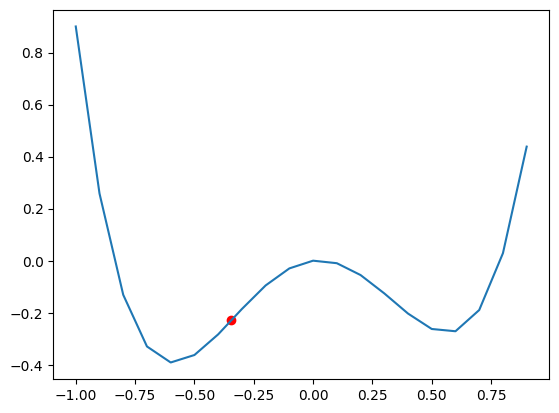

In [9]:
plt.plot(x,func(x))
plt.scatter(x_gd,y_gd,c="r")
plt.show()

In [10]:
_x=x_gd[-1]
f_=12*_x*_x*_x-4*_x
#f_=derivative(func,_x,dx=1e-6)
x_gd=np.append(x_gd,_x-lr*f_)
y_gd=np.append(y_gd,func(x_gd[-1]))
print(x_gd)
print(y_gd)

[-0.34456227 -0.43329815]
[-0.22961698 -0.31307726]


## Линейная регрессия
$$
a(x_1,...,x_n) = w_1*x_1+...+w_n*x_n = X^t \cdot W\\
$$

\begin{equation*}
 \begin{cases}
   x_1^t \cdot w = y_1 \\
   \ \ ... \\
   x_n^t \cdot w = y_n 
\end{cases}
\end{equation*}

$$
\|X \cdot W -Y \|_2^2 → min
$$

In [11]:
def lin_func(x,w):
  return x@w.T

In [12]:
len=20
W=np.array([-1,3])
x=[]
for i in range(-10,10):
  for j in range(-10,10):
    x.append([i,j])
X=np.array(x) 
Y=lin_func(X,W)
# print(X.shape)
# print(Y)

In [13]:
print(X[16])
print(W)
print(Y[16])

[-10   6]
[-1  3]
28


In [14]:
def plot_func1(func,x,w,from_val,to_val,step): 

  X=x.T[0].reshape(-1,len)
  Y=x.T[1].reshape(-1,len)
  z = func(x,w)
  Z=z.reshape(-1,len)
  fig = plt.figure(figsize =(14, 9))
  ax = plt.axes(projection ='3d')
  ax.plot_surface(X, Y, Z)
  plt.show()

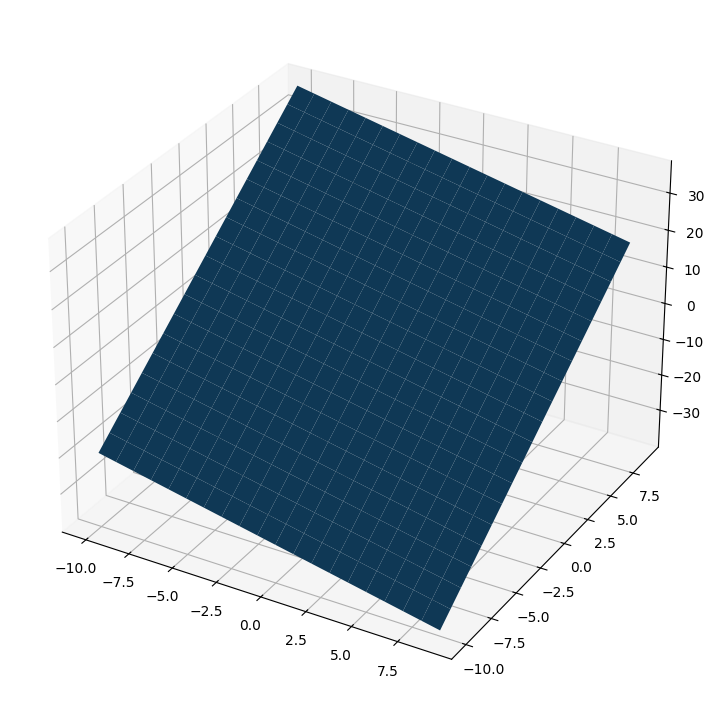

In [15]:
plot_func1(lin_func,X,W,-10,10,32)

#Отклонение (loss) MSE

In [16]:
len=20
w=[]
for i in range(-10,10):
  for j in range(-10,10):
    w.append([i,j])
W=np.array(w) 

def loss(x,w):
  y_=lin_func(x,w).diagonal()
  return np.square(y_-Y)
loss(W,X).shape


(400,)

In [17]:
YY=loss(W,X)
print(X[16])
print(W[16])
print(YY[16])

[-10   6]
[-10   6]
11664


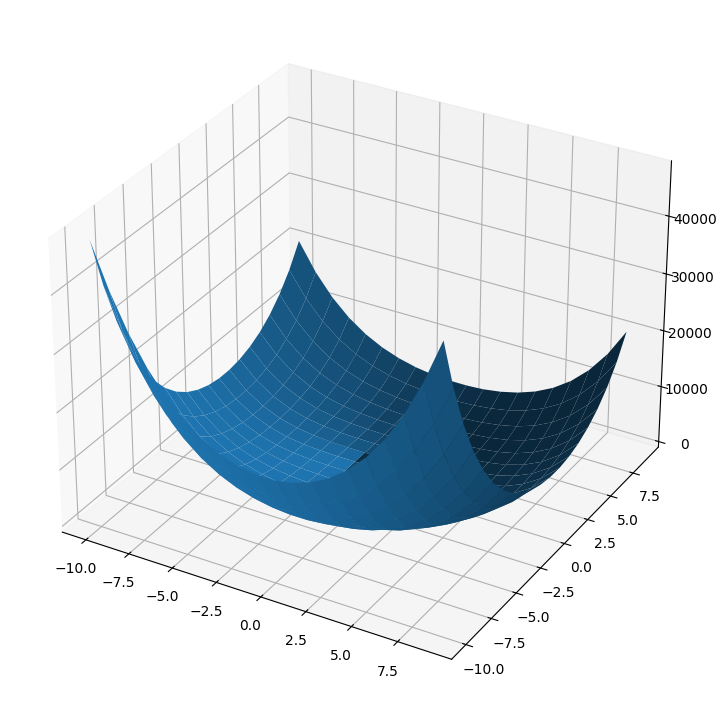

In [18]:
plot_func1(loss,X,W,-30,30,32)

## Решение обратной матрицей

### Разбор теории решения методом обратной матрицы . Случай квадратной матрицы

$$ 
X w^t = Y
$$
$$
w=X^{-1} Y^t
$$

In [19]:
w1=3; w2=2
def lin_func(x1,x2):
  return w1*x1+w2*x2
x1=np.array([1,2])
x2=np.array([3,4])
Y=[lin_func(x1,x2)]
print(Y)

[array([ 9, 14])]


In [20]:
Y=np.array(Y)
X=np.array([x1,x2]).T
det_X= np.linalg.det(X)
print(det_X)
assert(det_X!=0)
X_inv=np.linalg.inv(X)
print(X_inv)
W=np.dot(X_inv,Y.T)
print(W)

-2.0
[[-2.   1.5]
 [ 1.  -0.5]]
[[3.]
 [2.]]


### Разбор теории решения методом обратной матрицы . Случай прямоугольной матрицы

$$
\|Xw-y\|_2^2 = (Xw-y)^t(Xw-y)= \\ w^tX^tXw-w^tX^ty - y^tXw + y^ty
$$
$$
∇\|Xw-y\|_2^2 = 0 ; \\
∇\|Xw-y\|_2^2 = 2X^tXw -2X^ty=0;  \\
2X^t(Xw-y)=0
$$

$$
∇\|Xw-y\|_2^2 = 0 ; \\
2X^tXw -2X^ty=0 ; \\
X^tXw=X^ty ;\\
w=(X^tX)^{-1}X^ty
$$

In [21]:
w1=3; w2=2
def lin_func(x1,x2):
  return w1*x1+w2*x2
x1=np.array([1,2,3,4])
x2=np.array([3,4,5,6])
Y=[lin_func(x1,x2)]
print(Y)

[array([ 9, 14, 19, 24])]


In [22]:
Y=np.array(Y)
X=np.array([x1,x2]).transpose()
XX=np.dot(X.transpose(),X)
det_XX= np.linalg.det(XX)
print(det_XX)
assert(det_XX!=0)
XX_inv=np.linalg.inv(XX)
print(XX_inv)
W=np.dot(XX_inv,X.transpose())
W=np.dot(W,Y.transpose())
print(W)

80.00000000000004
[[ 1.075 -0.625]
 [-0.625  0.375]]
[[3.]
 [2.]]


# Решение SGD
пусть прямая задана функцией
$$
y=x_1*w_1+x_2*w_2 \\
y=xw^t
$$
**Важно!** искомая переменная - вектор w 

Готовим исходные данные


In [23]:
n_features = 2
n_objects = 300
batch_size = 10
epochs = 40
w_orig = np.random.normal(size=(n_features, ))
X = np.random.uniform(-5, 5, (n_objects, n_features))
Y = X @ w_orig + np.random.normal(0,1, n_objects)

In [24]:
print(w_orig)
print("X {} : {} ".format(X.shape,X[0]))
print("Y {} : {} ".format(Y.shape,Y[0]))


[-0.61996819  1.14457052]
X (300, 2) : [-0.68691193  1.52798209] 
Y (300,) : 1.0611425174304874 


выполняем полный GD

In [25]:
lr_0=lr = 0.02
w_0 = np.random.uniform(-2, 2, n_features)-0.5
w_list = np.array([w_0])
for i in range(epochs):
  # lr = lr_0 / ((i+1) ** 0.51)  ## изменяемый шаг обучения
  w = w_list[-1] - lr * 2 * np.dot(X.T, (X.dot(w_list[-1]) - Y))  / n_objects 
  w_list=np.append(w_list,[w],axis=0)

Результат

In [26]:
print("Найденные w:{} \n Исходные w: {}".format(w_list[-1],w_orig ))
w_list.shape


Найденные w:[-0.60050002  1.17074466] 
 Исходные w: [-0.61996819  1.14457052]


(41, 2)

Рисуем траекторию спуска по эквипотенциальной поверхности. На графике представлены разноцветные линии уровня - вдоль них значение функции потерь одинаково. В рассматриваем примере - фактически это "вид сверху" на параболоид.

In [27]:
def plot_trajectory(w_list):
  A, B = np.meshgrid(np.linspace(-2, 2, 100), np.linspace(-2, 2, 100))
  levels = np.empty_like(A)
  for i in range(A.shape[0]):
    for j in range(A.shape[1]):
      w_tmp = np.array([A[i, j], B[i, j]])
      levels[i, j] = np.mean(np.power(np.dot(X, w_tmp) - Y, 2))
  plt.figure(figsize=(13, 9))
  plt.title("GD trajectory")
  plt.xlabel("$w_1$")
  plt.ylabel("$w_2$")
  plt.xlim(w_list[:, 0].min() - 0.1, w_list[:, 0].max() + 0.1)
  plt.ylim(w_list[:, 1].min() - 0.1, w_list[:, 1].max() + 0.1)
  plt.gca().set_aspect("equal")
  # visualize the level set
  CS = plt.contour(A, B, levels, levels=np.logspace(0, 2, num=15),
  cmap=plt.cm.rainbow_r)
  CB = plt.colorbar(CS, shrink=0.8, extend="both")
  # visualize trajectory
  plt.scatter(w_orig[0], w_orig[1], c='r')
  plt.scatter(w_list[:, 0], w_list[:, 1])
  plt.plot(w_list[:, 0], w_list[:, 1])
  plt.show()

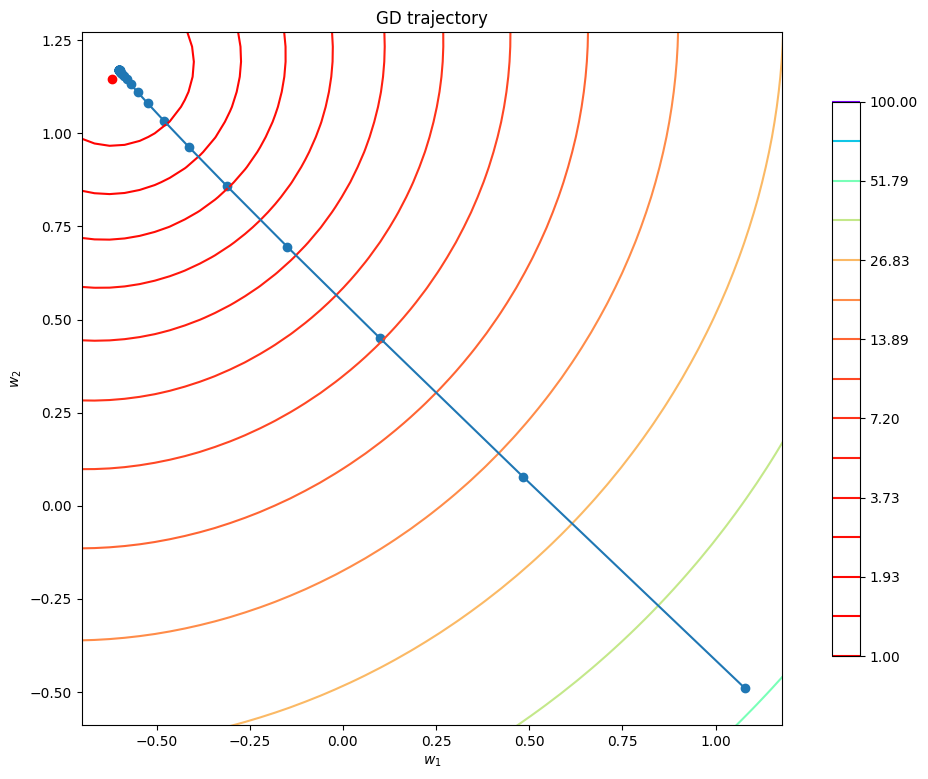

In [28]:
plot_trajectory(w_list)

Рисуем регрессию

In [29]:
def plot_regr(X,Y,w_list):
  w1=w_list[-1][0]
  w2=w_list[-1][1]
  fig = plt.figure(figsize =(14, 9))
  ax = plt.axes(projection ='3d')
  ax.scatter(X[:,0],X[:,1],Y) 

  x_regr=[-5 , 5]
  y_regr=[-5 , 5]
  z_regr=[w1*-5 + w2*-5, 
          w1*5 + w2*5 ]
  ax.plot3D(x_regr, y_regr, z_regr,c="r")        
  plt.show()

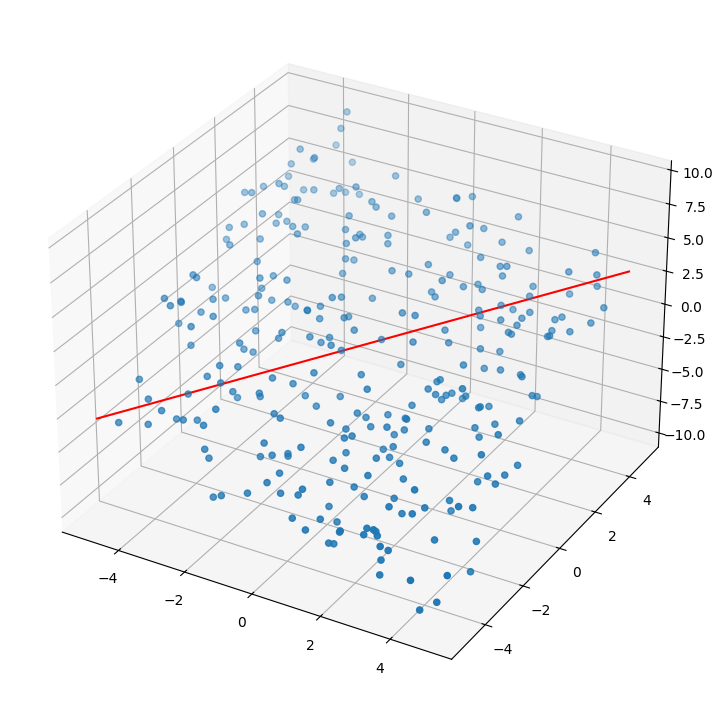

In [30]:
plot_regr(X,Y,w_list)

Решаем SGD

In [31]:
lr = 0.02
w_0 = np.random.uniform(-2, 2, n_features)-0.5
w_list = np.array([w_0])
for e in range(10):
  for i in range(n_objects):
    X_=X[i]
    Y_=Y[i]
    w = w_list[-1] - lr * 2 * np.dot(X_.T, (X_.dot(w_list[-1]) - Y_))  / n_objects 
    w_list=np.append(w_list,[w],axis=0)

Результат

In [32]:
print("Найденные w:{} \n Исходные w: {}".format(w_list[-1],w_orig ))
w_list.shape

Найденные w:[-0.57501395  1.13416571] 
 Исходные w: [-0.61996819  1.14457052]


(3001, 2)

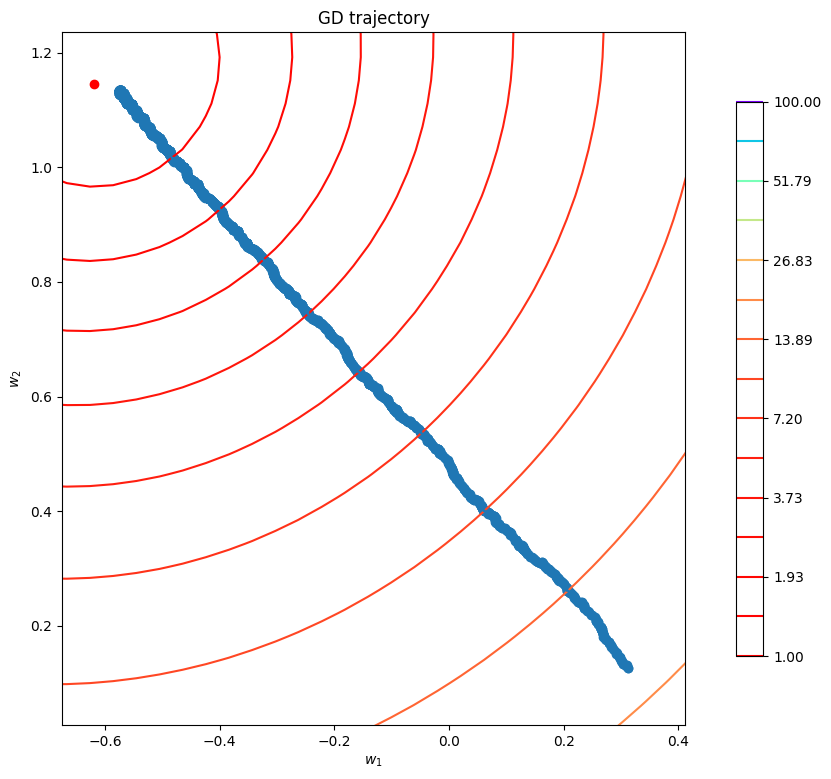

In [33]:
plot_trajectory(w_list)

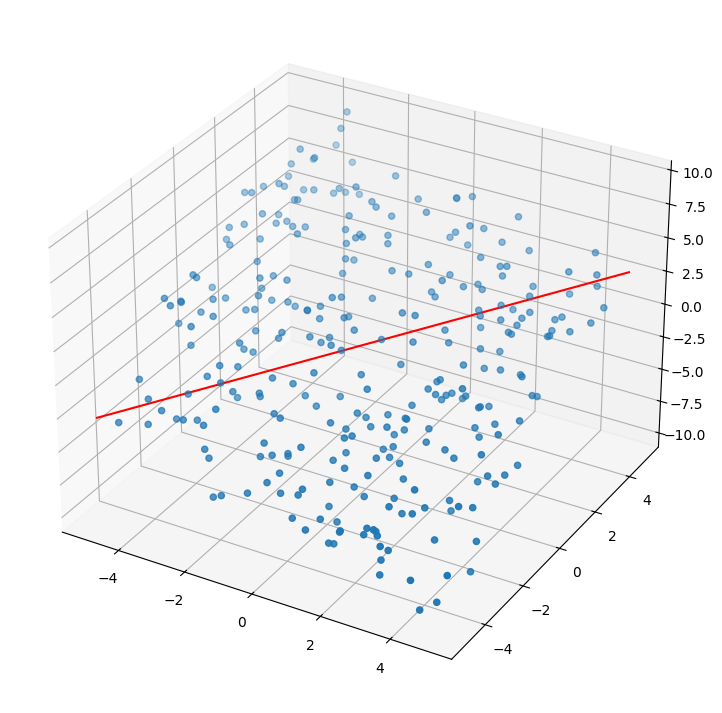

In [34]:
plot_regr(X,Y,w_list)

Батчевый спуск

In [35]:
lr = 0.02
batch=10
w_0 = np.random.uniform(-2, 2, n_features)-0.5
w_list = np.array([w_0])
for e in range(10):
  for i in range(0,n_objects,batch):
    X_ = X[i:i+batch, :]
    Y_ = Y[i:i+batch]
    w = w_list[-1] - lr * 2 * np.dot(X_.T, (X_.dot(w_list[-1]) - Y_))  / n_objects 
    w_list=np.append(w_list,[w],axis=0)

In [36]:
print("Найденные w:{} \n Исходные w: {}".format(w_list[-1],w_orig ))
w_list.shape

Найденные w:[-0.6133915  1.0807109] 
 Исходные w: [-0.61996819  1.14457052]


(301, 2)

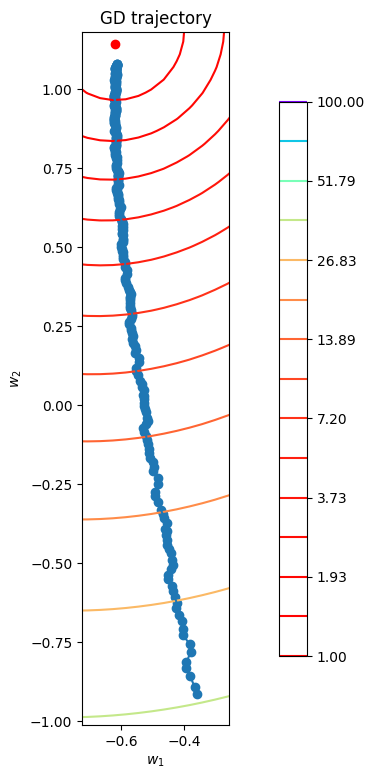

In [37]:
plot_trajectory(w_list)

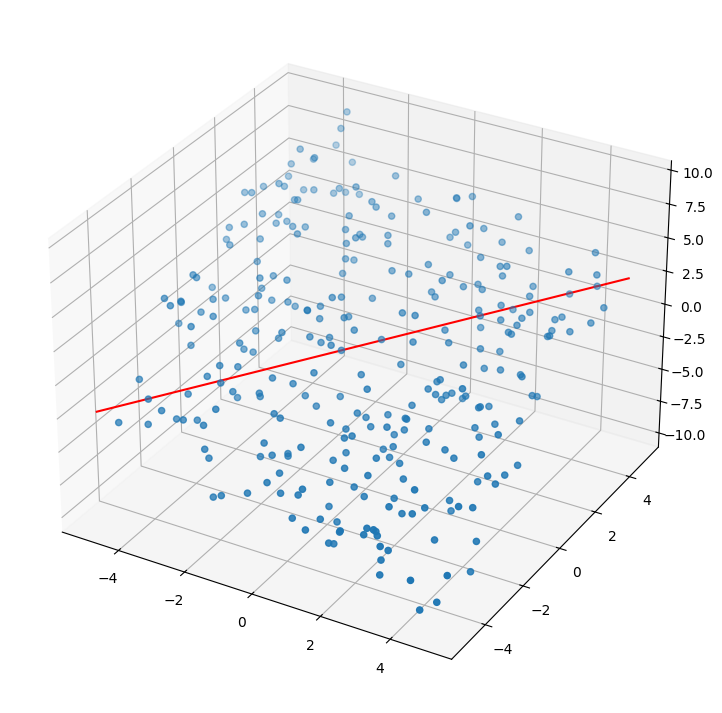

In [38]:
plot_regr(X,Y,w_list)

# Регрессионный анализ

In [39]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

/tmp/ipykernel_10999/3338272293.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [40]:
X_all = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data", \
                    header=None, na_values=["?"])

In [41]:
X_all.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [42]:
y = X_all[25]
X_raw = X_all.drop(25, axis=1)

In [43]:
from sklearn import preprocessing


## Пример обучения регрессии

In [44]:
X_raw=X_all.iloc[:,[10,21,25]] # длинна, лошадинные силы (мощность), цена
X_raw.head()

,10,21,25
0,168.8,111.0,13495.0
1,168.8,111.0,16500.0
2,171.2,154.0,16500.0
3,176.6,102.0,13950.0
4,176.6,115.0,17450.0


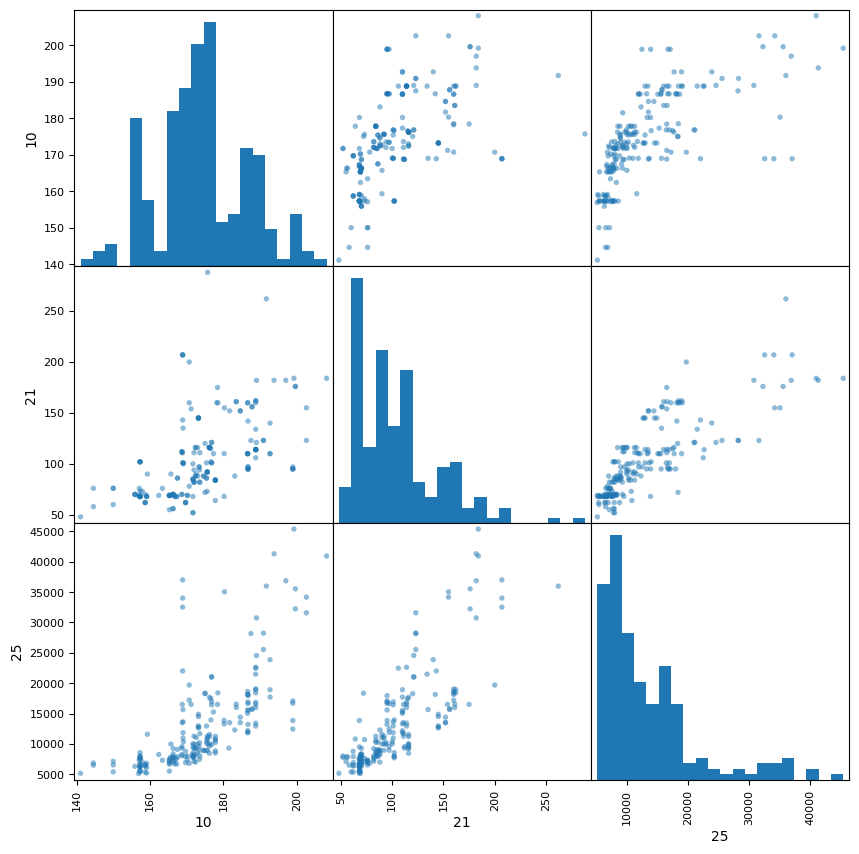

In [45]:
pd.plotting.scatter_matrix(X_raw, figsize=(10, 10),  hist_kwds={'bins': 20}, s=60, alpha=.5)
plt.show()

In [46]:
# для вещественнозначных признаков заполним пропуски средними
X_real = X_raw[X_raw.columns]
from sklearn.impute import SimpleImputer
mis_replacer = SimpleImputer(strategy="mean")
X_no_mis_real = pd.DataFrame(data=mis_replacer.fit_transform(X_raw), columns=X_raw.columns)


In [47]:
# отделим признак цены как целевое значение
y_ = X_no_mis_real[25].copy()
X_ = X_no_mis_real.drop(25, axis=1).copy()
# X_.iloc[0],y_[0]

In [48]:
# разрежем датасет на обучающий и тестовый
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.33, random_state=42)

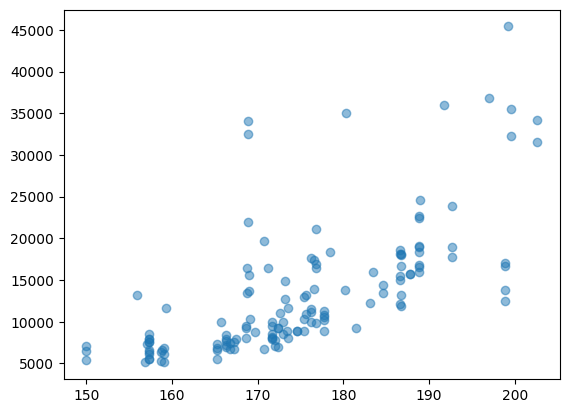

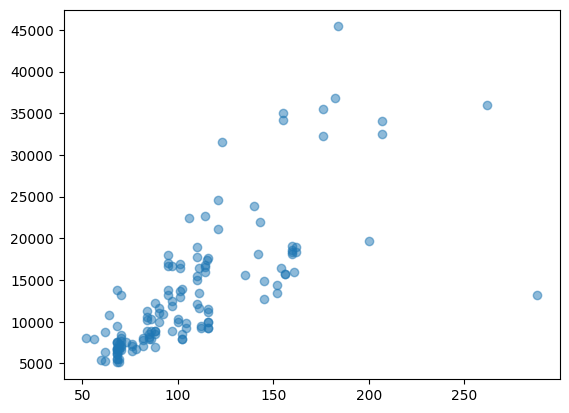

In [49]:
# графическое представление обучающего датасета
plt.scatter(X_train[10], y_train, alpha=.5)
plt.show()
plt.scatter(X_train[21], y_train, alpha=.5)
plt.show()

In [50]:
def plot_regr(X,Y,y,w,b):
    fig = plt.figure(figsize =(14, 9))
    ax = plt.axes(projection ='3d')
    ax.scatter(X[:,0],X[:,1],Y) 
    i=X[:,0].argmin()
    j=X[:,0].argmax()
    x_regr=[X[i,0] , X[j,0]]
    y_regr=[X[i,1] , X[j,1]]
    z_regr = [X[i,0] *w[0]+X[i,1]*w[1]+b,
              X[j,0]*w[0]+X[j,1]*w[1]+b]
    print((y[i],y[j]))
    ax.scatter(x_regr,y_regr,z_regr,c="w") 
    ax.plot(x_regr,y_regr,[y[i],y[j]],c="r") 
    ax.plot(x_regr,y_regr,[Y[i],Y[j]],c="g") 
    plt.show()

Обучим линейную модель LinearRegression, с функцией потерь MSE

In [51]:
from sklearn.linear_model import LinearRegression as LR
X_=X_train.copy()
Y_=y_train.copy()
n_objects=X_.shape[0]
n_features=X_.shape[1]
lr = LR()
lr.fit(X_, Y_)  # найдем веса линейной модели

LinearRegression()

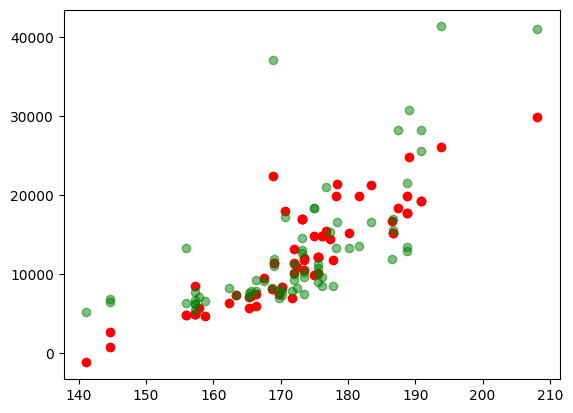

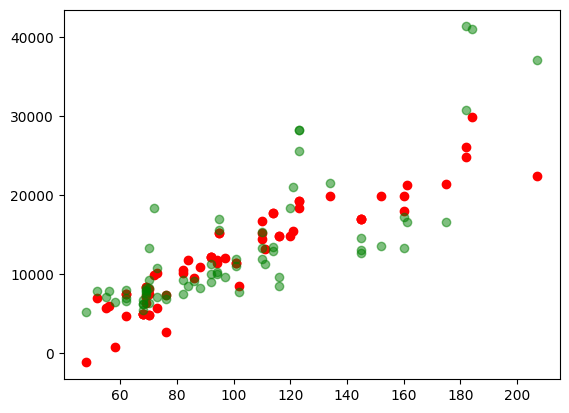

In [52]:
# сравним предсказание на тестовом датасетом с истинным значением
y_=lr.predict(X_test) # предскажем
#длинна машины
plt.scatter(X_test[10],y_,c='r')
# plt.scatter(X_[10], Y_, alpha=.5)
plt.scatter(X_test[10], y_test, alpha=.5,color='g')
plt.show()
#лошадинные силы
plt.scatter(X_test[21],y_,c='r')
# plt.scatter(X_[21], Y_, alpha=.5)
plt.scatter(X_test[21], y_test, alpha=.5,color='g')
plt.show()

(-1239.8464309011615, 29869.34030363527)


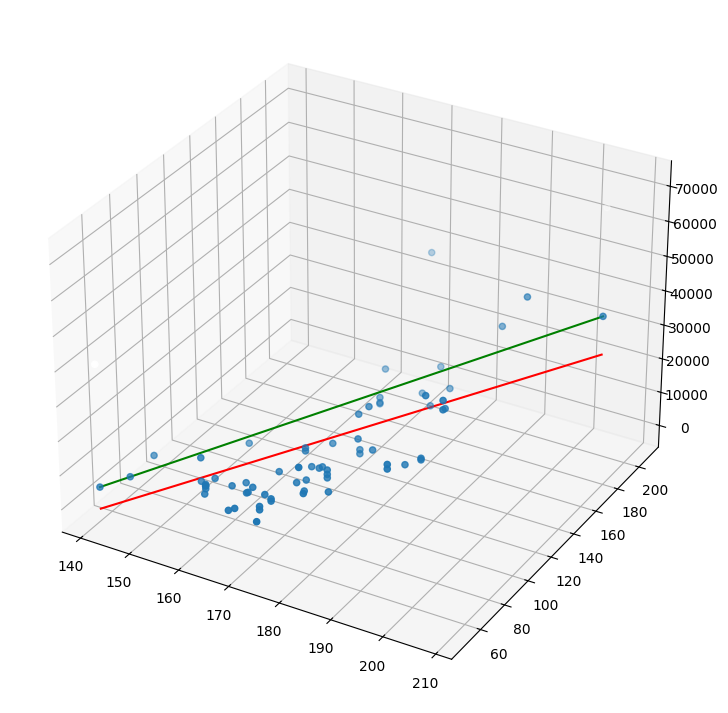

In [53]:
plot_regr(np.array([X_test[10],X_test[21]]).T,np.array(y_test),y_,lr.coef_,0)

### Решим аналитическуим методом

In [54]:
X_=X_train.copy().values
Y_=y_train.copy().values
W_=np.linalg.inv(X_.T @ X_).dot(X_.T).dot(Y_)
# Y_[:10],(X_ @ W_.T)[:10]

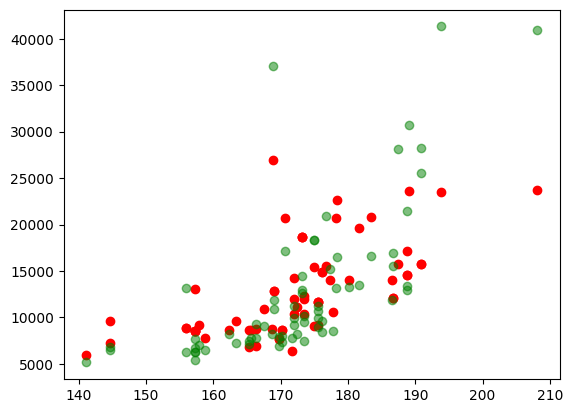

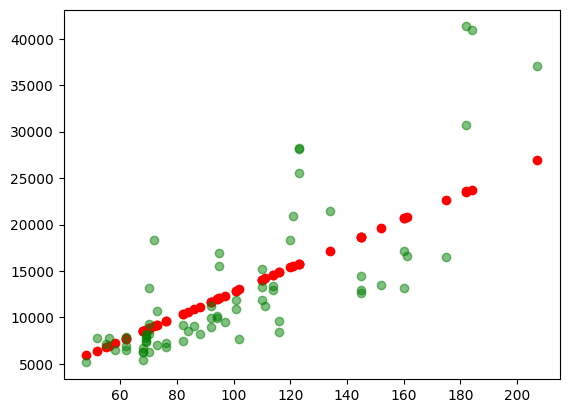

In [55]:
# сравним предсказание на тестовом датасетом с истинным значением
y_=X_test @ W_.T # предскажем
#длинна
plt.scatter(X_test[10],y_,c='r')
plt.scatter(X_test[10], y_test, alpha=.5,color='g')
plt.show()
#лошадинные силы
plt.scatter(X_test[21],y_,c='r')
plt.scatter(X_test[21], y_test, alpha=.5,color='g')
plt.show()

In [56]:
y_.values[52]

6801.800683070024

(14548.86339919563, 6801.800683070024)


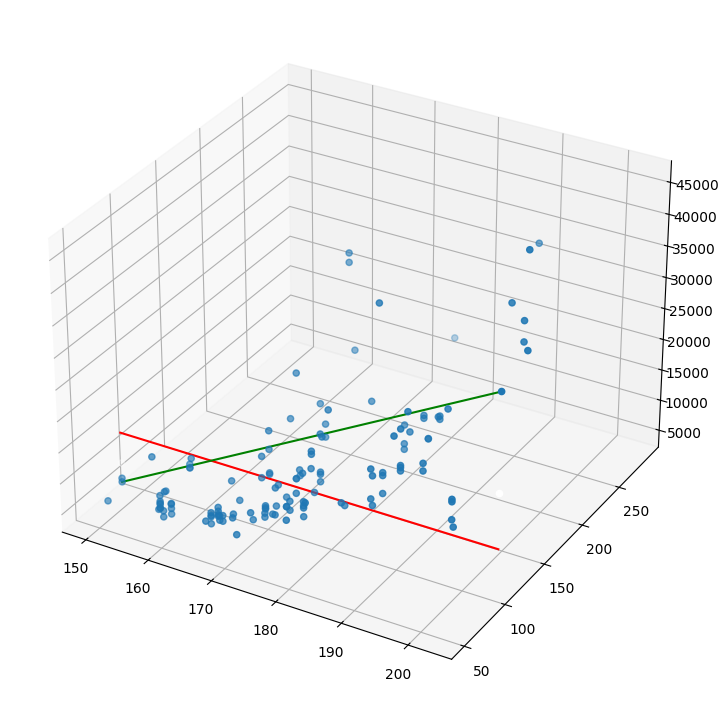

In [57]:
plot_regr(X_,Y_,y_.values,W_,0)

### Своя регрессия

In [58]:
def predict(x, w, b):
  return x@w.T + b

def mse_loss(x, w, b, y):
  return np.mean((predict(x, w, b) - y)**2)

def mse_derivatives(x, w, b, y):
  L=predict(X_,w,b)-Y_
  return 2*np.mean((X_.T*L),axis=1) , 2*np.mean(L)

In [59]:
w=np.array([3,5])  ## истинные веса
b=0.1   ## истинное смещение
X_=np.random.uniform(-3,3,size=(10,2))
Y_=X_ @ w.T + b 
# print(X_)
# print(Y_)
w=np.array([1,0])  ## случайные веса
b=0  ## случайное смещение
L=predict(X_,w,b)-Y_
print(Y_)
X_[0],Y_[0]

[10.1829786  -6.61444731 -2.0219063  -6.06530782  2.44898813 -0.95940584
  3.04685824 -0.37972087  9.00000619  5.01337324]


(array([-0.41292878,  2.26435299]), 10.1829785969599)

In [60]:
n_objects=X_.shape[0]
n_features=X_.shape[1]
epochs=20000
lr_0=lr = 0.0001
b_0=10;
w_0 = np.random.uniform(-1, 1,n_features)-0.5
w_list = np.array([w_0])
b_list=np.array([b_0])
for i in range(epochs):
    # lr = lr_0 / ((i+1) ** 0.51)  ## изменяемый шаг обучения
    w=w_list[-1].copy()
    b=b_list[-1].copy()
    if i%1000 == 0: print(mse_loss(X_,w,b,Y_))
    dw, db = mse_derivatives(X_, w, b, Y_)
    w = w - lr * dw
    b = b - lr * db
    w_list=np.append(w_list,[w],axis=0)
    b_list=np.append(b_list,[b],axis=0)

108.91536596824137
39.42115529416416
27.11841238304529
23.209129946319067
20.760542154644142
18.742462131891447
16.970048989589365
15.388100536793065
13.966882504760937
12.685138029545527
11.52618144727455
10.47636499545299
9.52421890031108
8.659902590373335
7.874838044470074
7.161457750673648
6.5130264968891085
5.923511397777837
5.387483909567142
4.90004345508912


In [61]:
L=predict(X_,w,b)-Y_
# print(L)
print(predict(X_,w,b)[:10])
print(Y_[:10])

[10.62020778 -5.91422319  1.89058011 -4.93088749  2.5333421   3.53126637
  1.59365513  0.01069451  8.76757509  2.82245627]
[10.1829786  -6.61444731 -2.0219063  -6.06530782  2.44898813 -0.95940584
  3.04685824 -0.37972087  9.00000619  5.01337324]


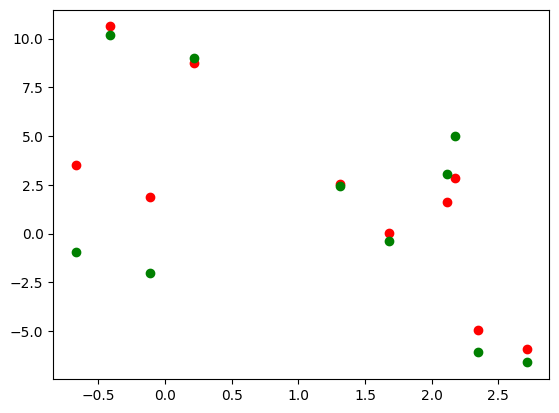

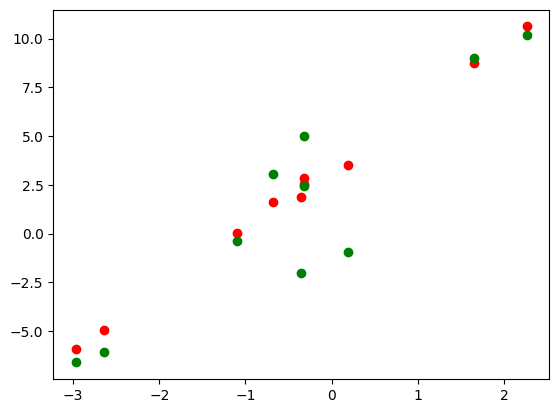

In [62]:
# сравним предсказание на тестовом датасетом с истинным значением
y_=predict(X_,w_list[-1],b_list[-1]) # предскажем
#длинна машины
plt.scatter(X_[:,0],y_,c='r')
plt.scatter(X_[:,0],Y_,c='g')
plt.show()
#лошадинные силы
plt.scatter(X_[:,1],y_,c='r')
plt.scatter(X_[:,1],Y_,c='g')
plt.show()

(3.531266368945393, -5.914223191662144)


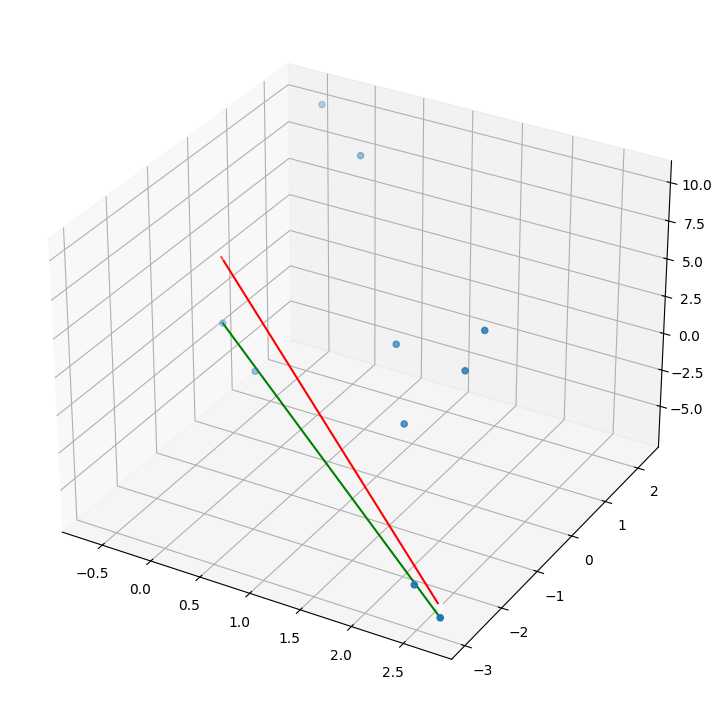

In [63]:
plot_regr(X_,Y_,y_,w_list[-1],b_list[-1])

# The END!